In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/content/youtube_sentiment_data.csv')


df['hf_sentiment'] = df['hf_sentiment'].str.capitalize()
df['sql_sentiment'] = df['sql_sentiment'].str.capitalize()

# Define sentiment order and color mapping
sentiment_order = ['Positive', 'Neutral', 'Negative']
sentiment_colors = {'Positive': 'green', 'Neutral': 'gold', 'Negative': 'red'}


<ipython-input-6-07468d6cf050>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hf_counts.index, y=hf_counts.values, ax=axes[0, 0],
<ipython-input-6-07468d6cf050>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sql_counts.index, y=sql_counts.values, ax=axes[0, 1],


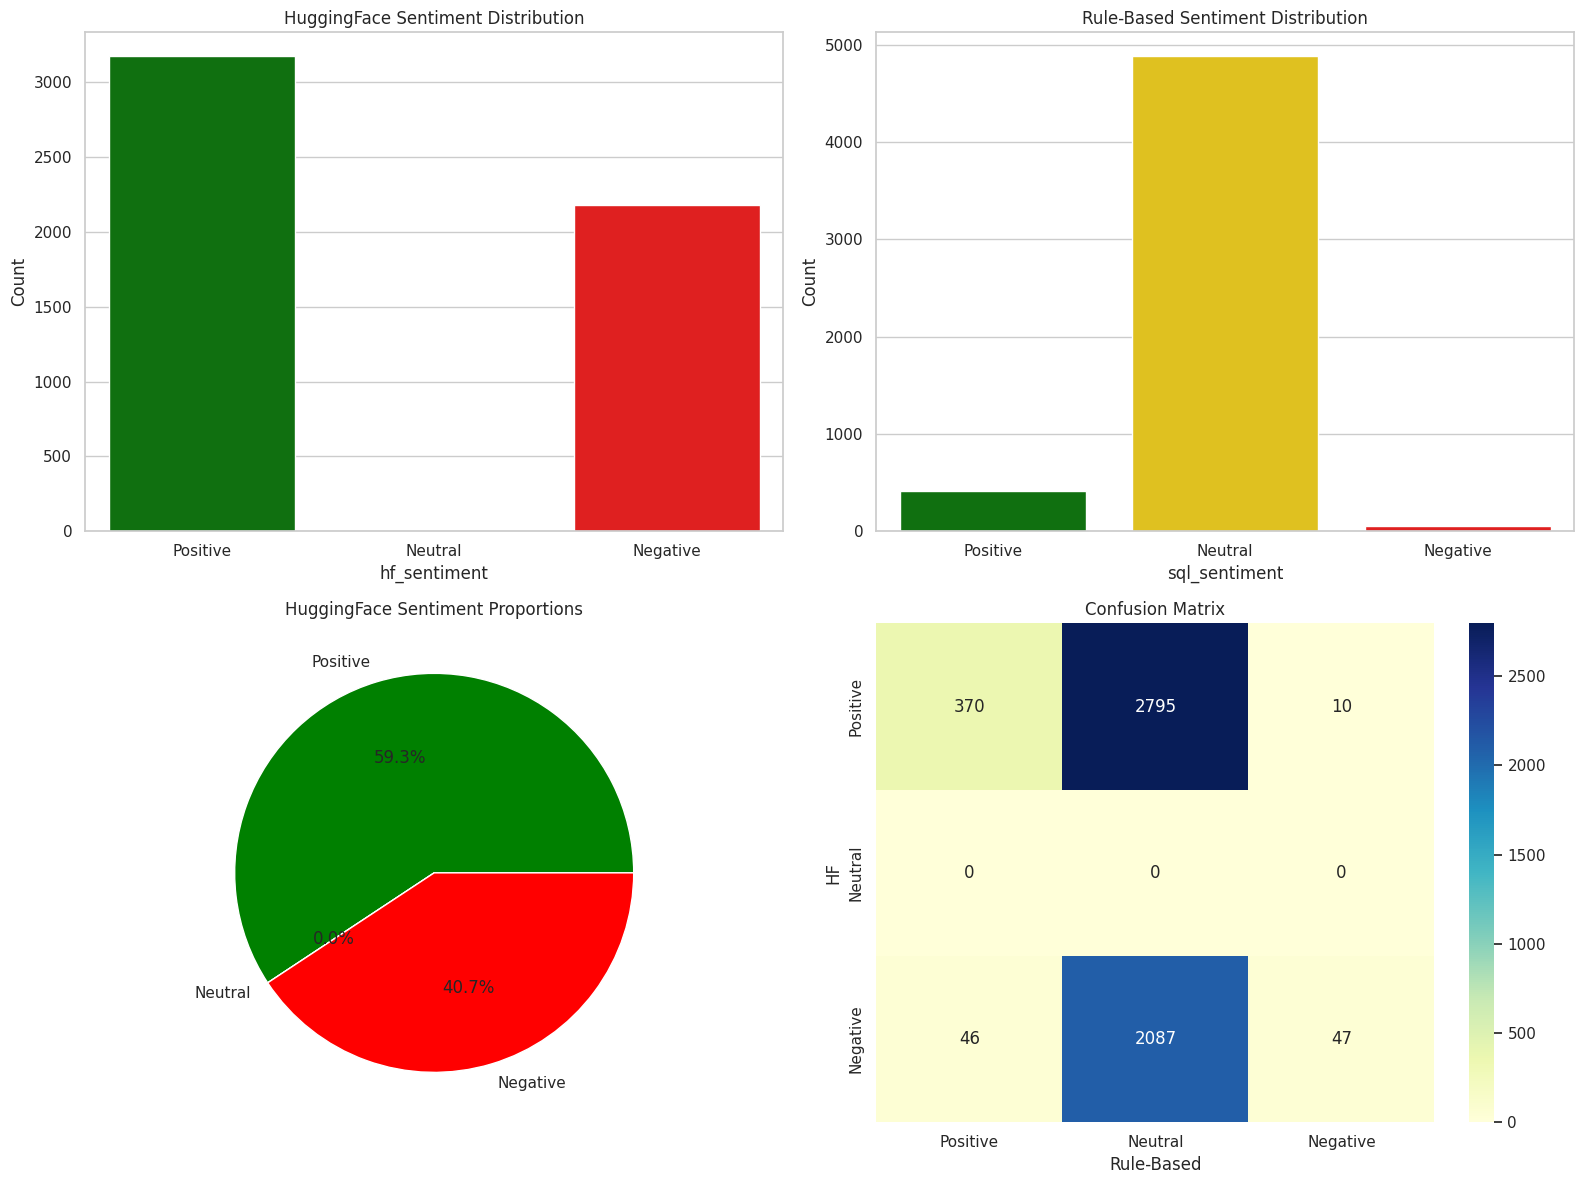

<Figure size 640x480 with 0 Axes>

In [6]:
hf_counts = df['hf_sentiment'].value_counts().reindex(sentiment_order, fill_value=0)
sql_counts = df['sql_sentiment'].value_counts().reindex(sentiment_order, fill_value=0)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. HuggingFace sentiment distribution
sns.barplot(x=hf_counts.index, y=hf_counts.values, ax=axes[0, 0],
            palette=[sentiment_colors[sent] for sent in hf_counts.index])
axes[0, 0].set_title('HuggingFace Sentiment Distribution')
axes[0, 0].set_ylabel('Count')

# 2. Rule-Based sentiment distribution
sns.barplot(x=sql_counts.index, y=sql_counts.values, ax=axes[0, 1],
            palette=[sentiment_colors[sent] for sent in sql_counts.index])
axes[0, 1].set_title('Rule-Based Sentiment Distribution')
axes[0, 1].set_ylabel('Count')

# 3. Pie chart for HuggingFace
axes[1, 0].pie(hf_counts.values,
               labels=hf_counts.index,
               autopct='%1.1f%%',
               colors=[sentiment_colors[sent] for sent in hf_counts.index])
axes[1, 0].set_title('HuggingFace Sentiment Proportions')

# 4. Confusion matrix
conf_matrix = pd.crosstab(df['hf_sentiment'], df['sql_sentiment'],
                          rownames=['HF'], colnames=['Rule-Based'],
                          dropna=False).reindex(index=sentiment_order, columns=sentiment_order, fill_value=0)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', ax=axes[1, 1])
axes[1, 1].set_title('Confusion Matrix')

plt.tight_layout()
plt.show()


# Plot mismatches

plt.tight_layout()
plt.show()
